# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [1]:
import requests
import time
from tqdm.auto import tqdm

In [2]:
sber = '3529'
page = 1
num_per_page = 100
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [3]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
print(num_pages)

20


In [4]:
#собираем вакансии по всем страницам
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    for j in range(len(vacancies.get('items'))):
        vacancy_ids = vacancies.get('items')[j].get('id')
        all_vacancy_ids.append(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [17]:
id_list = []
for i in tqdm(range(len(all_vacancy_ids))):
    if i%20 == 0: time.sleep(3)
    url = f'https://api.hh.ru/vacancies/{all_vacancy_ids[i]}'
    res = requests.get(url)
    wanted_vacs = res.json()
    id_list.append(wanted_vacs)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [18]:
#Создайте DataFrame в котором будут даты публикации вакансий, названия, описания, только добавьте поле ключевые навыки
import pandas as pd
vacs_table = pd.DataFrame(id_list, columns = ['name', 'published_at', 'description', 'key_skills'])

In [ ]:
#Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
#Найдите вакансии с использованием python, которые вам интересны
#Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
#Постройте график наиболее востребованных навыков

In [19]:
vacs_table.head()

,name,published_at,description,key_skills
0,Исполнительный директор,2023-03-27T11:35:17+0300,<p>Команда управления по работе со специальным...,[]
1,Менеджер проектов ВЭД,2023-03-27T19:16:00+0300,<p>Сбер — лучший работодатель России. У нас бо...,[]
2,Финансовый консультант,2023-03-14T11:22:39+0300,<p> </p> <p><strong>Финансовый консультант </s...,"[{'name': 'Деловое общение'}, {'name': 'Активн..."
3,Руководитель проектов,2023-03-27T13:05:38+0300,<p>Команда управления по работе со специальным...,[]
4,Frontend (React) developer,2023-03-27T16:11:27+0300,<p>Мы разрабатываем web-приложение интерактивн...,[]


In [27]:
#обработка содержимого ДФ
import datetime
import re
#добавляем новый столбец для заполнения названиями дней недели
vacs_table['weekday'] = ''
for i in range(vacs_table.shape[0]):
    key_skills_list = []
    #Переведите даты публикаций в формат datetime
    #если объект не является датой, то корректируем данные в таблице
    if isinstance(vacs_table.published_at[i], datetime.date) == False:
        qqq = datetime.date(int(vacs_table.published_at[i][0:4]),int(vacs_table.published_at[i][5:7]),int(vacs_table.published_at[i][8:10]))
        vacs_table.published_at.replace(vacs_table.published_at[i], qqq, inplace=True)
    #Переведите даты в названия дней недели
    www = qqq.weekday()
    if www == 0: www = "понедельник"
    elif www == 1: www = "вторник"
    elif www == 2: www = "среда"
    elif www == 3: www = "четверг"
    elif www == 4: www = "пятница"
    elif www == 5: www = "суббота"
    elif www == 6: www = "воскресение"
    vacs_table.weekday[i] = www


In [54]:
#проверяем итоговые данные
vacs_table.head()

,name,published_at,description,key_skills,weekday
0,Исполнительный директор,2023-03-27,Команда управления по работе со специальными п...,[],вторник
1,Менеджер проектов ВЭД,2023-03-27,Сбер — лучший работодатель России. У нас более...,[],вторник
2,Финансовый консультант,2023-03-14,Финансовый консультант Сбер — лучший рабо...,"[{'name': 'Деловое общение'}, {'name': 'Активн...",вторник
3,Руководитель проектов,2023-03-27,Команда управления по работе со специальными п...,[],вторник
4,Frontend (React) developer,2023-03-27,Мы разрабатываем web-приложение интерактивной ...,[],вторник


<Axes: xlabel='Дата размещения вакансии', ylabel='Количество вакансий'>

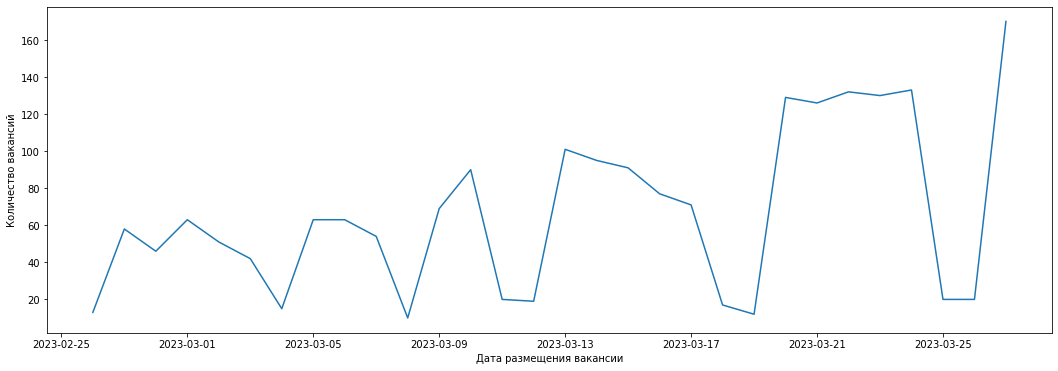

In [55]:
#постройте график опубликованных вакансий по датам
dates_visual = vacs_table.groupby('published_at')['name'].count()
dates_visual.plot(figsize=(18,6),
            xlabel='Дата размещения вакансии',
            ylabel='Количество вакансий'
         )

In [66]:
#определите день недели, в который больше всего публикуют вакансий
weekdates_table = vacs_table.groupby('weekday')['name'].count()
qqq = weekdates_table.sort_values(ascending=False).head(1)
print('Наибольшее количество публикаций вакансий происходит в следующий день недели:', qqq.index[0])

Наибольшее количество публикаций вакансий происходит в следующий день недели: 


In [67]:
#через цикл проверяем есть ли в названии вакансии слово Python

vac_py = []
for i in range(len(vac_desc)):
    if type(vac_desc['name'][i]) == str:
        if ('Python' in vac_desc['name'][i]) == True:
            vac_py.append(vac_desc['name'][i])
#print(vac_py)
print('Вакансий которые нам нравяться(со словом Python): '  + str(len(vac_py)))

Вакансий которые нам нравяться(со словом Python): 21


In [68]:
#Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
vac_skill = pd.DataFrame(vacs_table, columns = ['name','id','description','published_at','key_skills'])